In [3]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
#from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [4]:
# create a list with the qubits we want to use
qubit_list = [i for i in range(5)]

# save the length of the list = number of qubits = depth of the circuits = width of the circuits
SIZE = len(qubit_list)

In [5]:
from qiskit.quantum_info import random_unitary
# create a random 4x4 unitary matrix i.e. a random 2-qubit operator
random_unitary(4)

Operator([[-0.30884864+0.13955862j,  0.26336832-0.1187119j ,
            0.12847208-0.0633312j ,  0.87523709+0.1229823j ],
          [-0.44196728-0.04979908j,  0.68403374-0.3266348j ,
            0.06851917-0.20966731j, -0.40737048-0.11395857j],
          [-0.67941427-0.16014894j, -0.50423319-0.04248943j,
            0.38894467+0.26831622j, -0.08303696-0.16286627j],
          [-0.15082513-0.42109528j, -0.29221047+0.02255524j,
           -0.23620305-0.80731988j,  0.08017283+0.007063j  ]],
         input_dims=(2, 2), output_dims=(2, 2))

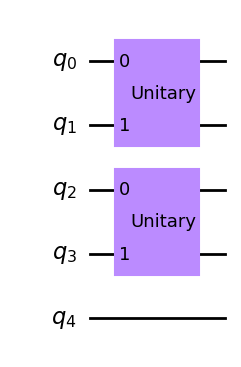

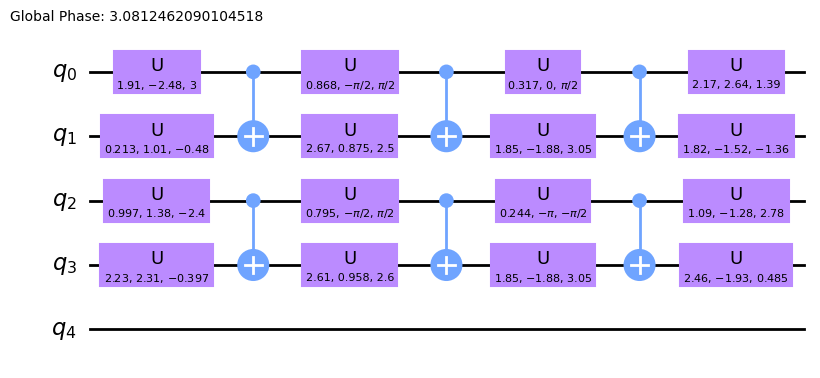

In [6]:
from qiskit import QuantumCircuit

# create the circuit corresponding to the first layer
qv_layer = QuantumCircuit(SIZE)

# iterate over the pairs of qubits, of which there are the integer part of SIZE/2
for pair in range(SIZE//2):
    # choose indexes
    qubit_indices = qubit_list[pair * 2 : pair * 2 + 2]
    # create gate
    gate = random_unitary(4).to_instruction()
    # add gate to circuit
    qv_layer.append(gate, qubit_indices)

# show the layer circuit
display(qv_layer.draw("mpl"))

# show a more detailed version of the layer circuit
display(qv_layer.decompose().draw("mpl"))

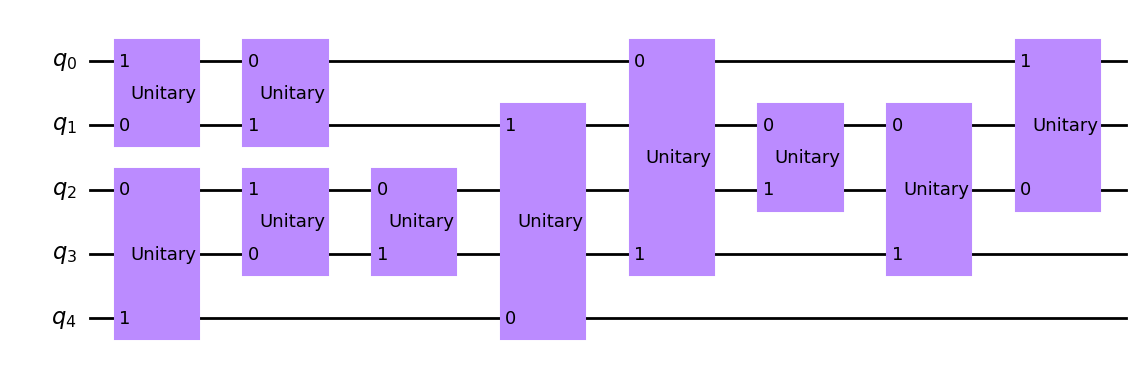

In [7]:
from random import shuffle

qlist = qubit_list[:]

# create the circuit
qv_circ = QuantumCircuit(SIZE)

# randomly permutate the list of qubits and add a layer SIZE = depth times
for i in range(SIZE):
    shuffle(qlist)
    for pair in range(SIZE//2):
        qubit_indices = qlist[pair * 2 : pair * 2 + 2]
        gate = random_unitary(4).to_instruction()
        qv_circ.append(gate, qubit_indices)

#show the circuit
display(qv_circ.draw("mpl"))

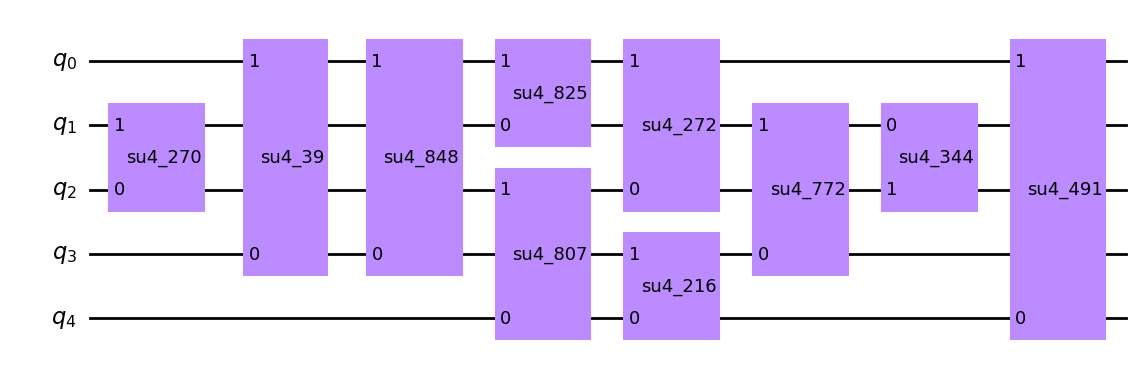

In [8]:


from qiskit.circuit.library import QuantumVolume

qv_circ = QuantumVolume(SIZE)

qv_circ.decompose().draw("mpl")



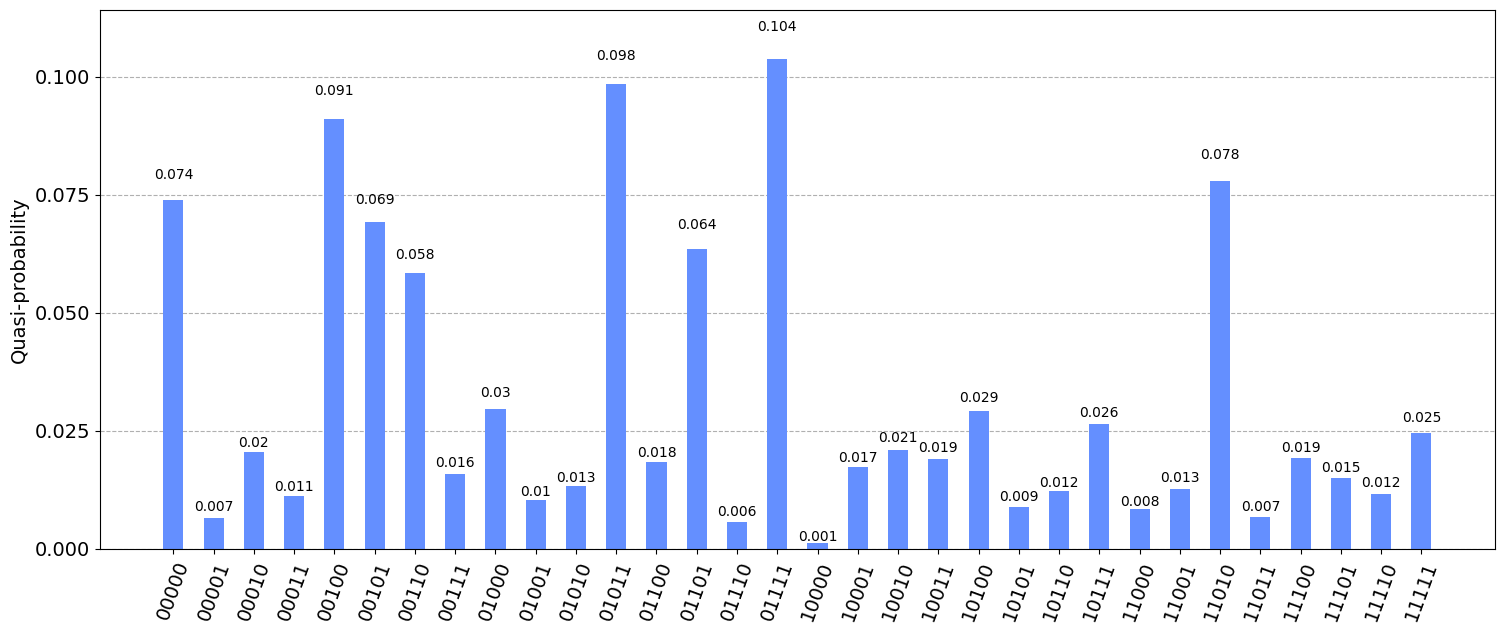

In [9]:


from qiskit import Aer, transpile
from qiskit.visualization import plot_histogram

# define the simulator
simulator = Aer.get_backend("aer_simulator")

# transpile the circuit so it can be used with the simulator
t_qv_circ = transpile(qv_circ, simulator)

# save the statevector of the circuit
t_qv_circ.save_statevector()

# run the simulator to get the probability distribution from the statevector
counts = simulator.run(t_qv_circ).result().get_counts()

# represent the probability distribution with an histogram
plot_histogram(counts, figsize = (18,7))



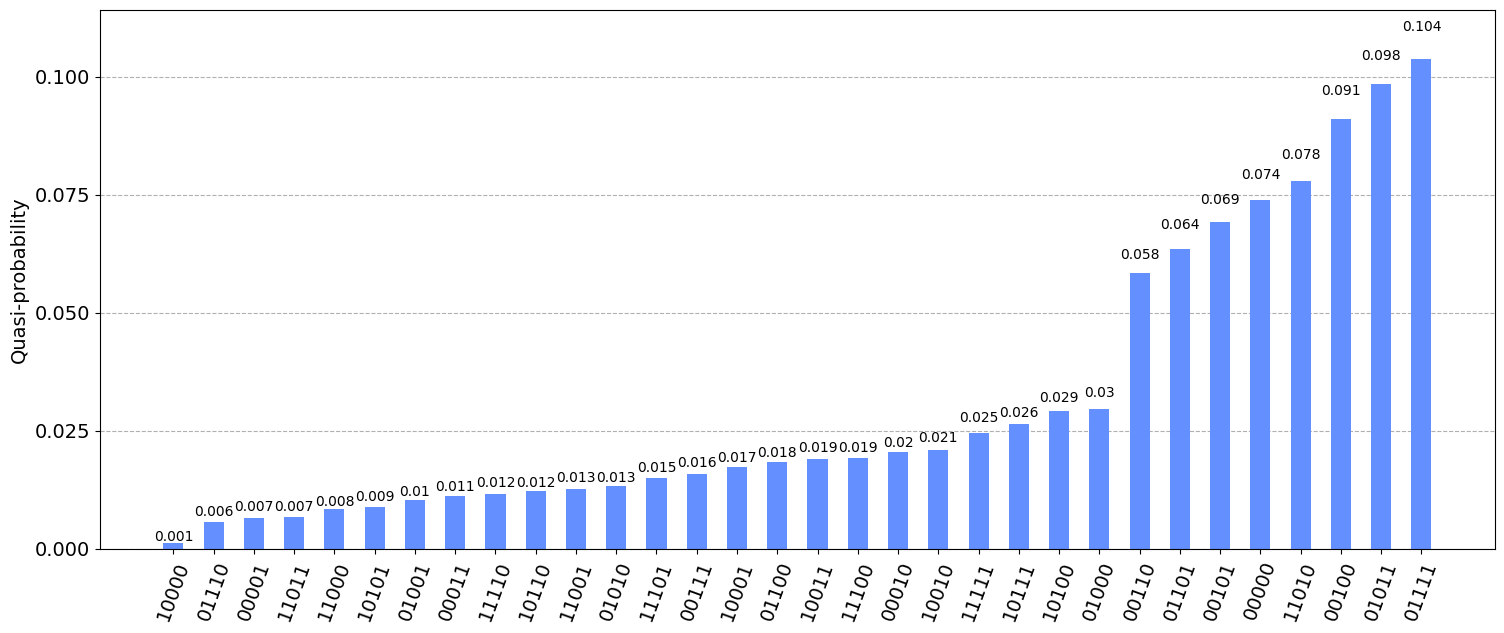

The heavy outputs of this circuit are: ['10011', '11100', '00010', '10010', '11111', '10111', '10100', '01000', '00110', '01101', '00101', '00000', '11010', '00100', '01011', '01111']


In [10]:
# order the bars of the histogram by ascending probability
display(plot_histogram(counts, figsize=(18,7), sort='value'))

# sort the list of outputs by probability
sorted_counts = sorted(counts.keys(), key=counts.get)

# pick the heavy outputs
heavy_outputs = sorted_counts[len(sorted_counts)//2 : ]

# show the heavy outputs
print("The heavy outputs of this circuit are:", heavy_outputs)

In [11]:
from qiskit import IBMQ

# save IBMQ account
#IBMQ.save_account(api_key)

# load IBMQ account
IBMQ.load_account()

C:\Users\monitsharma\AppData\Local\Temp\ipykernel_18480\771413207.py:7: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
C:\Users\monitsharma\AppData\Local\Temp\ipykernel_18480\771413207.py:7: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
%pip install qiskit_ibm_provider

In [14]:
from qiskit_ibm_provider import IBMProvider

provider = IBMQ.get_provider(hub="ibm-q", group="open", project="main")

In [15]:
# show backends
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [16]:


# choose quantum computer
backend = provider.get_backend('ibmq_belem')



In [18]:
!pip install seaborn

     -------------------------------------- 293.3/293.3 kB 6.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\monitsharma\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from qiskit.visualization import plot_error_map
plot_error_map(backend)

In [20]:
for i in backend.properties().gates:
    if "cx" in i.name:
        print(f"{i.name}, that acts on qubits {i.qubits} and has error rate of {i.parameters[0].value}")

cx4_3, that acts on qubits [4, 3] and has error rate of 0.009520231459175188
cx3_4, that acts on qubits [3, 4] and has error rate of 0.009520231459175188
cx3_1, that acts on qubits [3, 1] and has error rate of 0.00743423739169527
cx1_3, that acts on qubits [1, 3] and has error rate of 0.00743423739169527
cx2_1, that acts on qubits [2, 1] and has error rate of 0.007976069864570362
cx1_2, that acts on qubits [1, 2] and has error rate of 0.007976069864570362
cx1_0, that acts on qubits [1, 0] and has error rate of 0.013244784987131691
cx0_1, that acts on qubits [0, 1] and has error rate of 0.013244784987131691


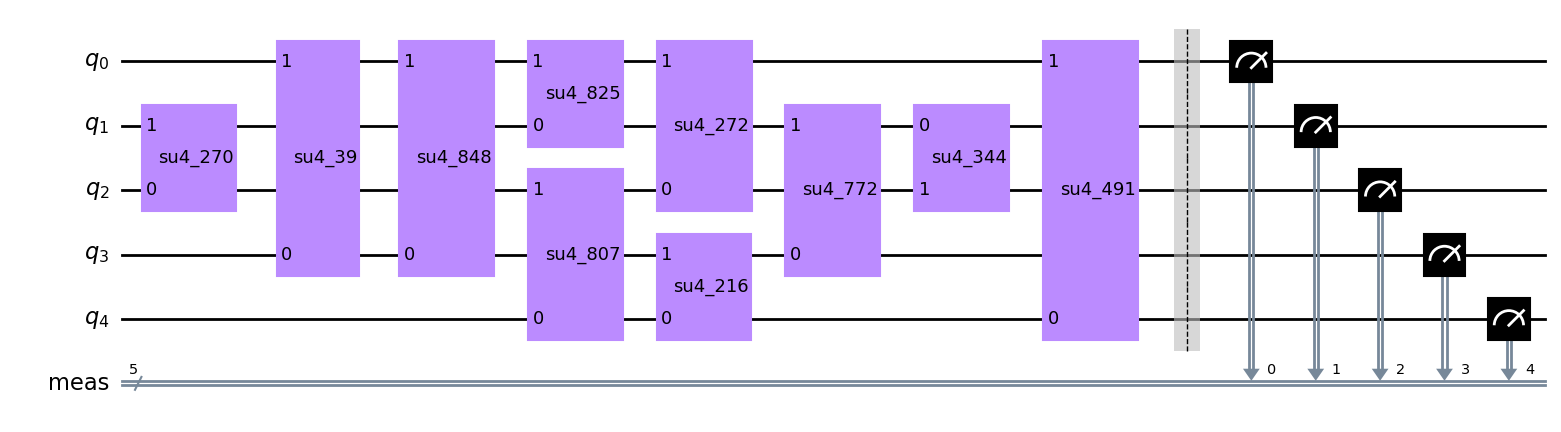

After running the circuit 1024 times, we got 533 heavy outputs


In [21]:
n_shots = 1024

# measure the circuit in order to get something meaningful from the quantum computer.
qv_circ.measure_all()

# show the circuit with the measures
display(qv_circ.decompose().draw("mpl"))

# transpile the circuit according to the backend
transpiled_qv_circ = transpile(qv_circ, backend)

# run the circuit on the backend
job = backend.run(transpiled_qv_circ, shots=n_shots)

# take the results
device_counts = job.result().get_counts()

# initialize number of heavy outputs
n_heavy = 0
# check if they are heavy outputs
for heavy_output in heavy_outputs:
    if heavy_output in device_counts.keys():
        n_heavy += device_counts[heavy_output]
n_heavy = int(n_heavy)

print("After running the circuit", n_shots, "times, we got", n_heavy, "heavy outputs")

In [23]:
from qiskit import Aer, transpile, QuantumCircuit, IBMQ
from qiskit.circuit.library import QuantumVolume
import numpy as np

# select the depth and width of the QV circuits
SIZE = 5

# number of times we will run each circuit
n_shots = 10000

# choose simulator
simulator = Aer.get_backend("aer_simulator")

# load IBMQ account
IBMQ.load_account()

# select provider
provider = IBMQ.get_provider(hub="ibm-q", group="open", project="main")

# choose quantum computer
backend = provider.get_backend('ibmq_belem')

# number of different circuits set to maximum permitted per job with this particular backend
n_circuits = 1000

# initialize a list of all the circuits
circuit_list = []

# initialize list of heavy outputs
heavy_outputs_list = []


for circuit in range(n_circuits):
    # create the QV circuit
    qv_circ = QuantumVolume(SIZE)
    # transpile circuit to use the simulator
    qv_circ_simulator = transpile(qv_circ, simulator)
    # save the statevector of the circuit
    qv_circ_simulator.save_statevector()
    # get probabilities
    counts = simulator.run(qv_circ_simulator).result().get_counts()
    # sort the results by probability
    sorted_counts = sorted(counts.keys(), key = counts.get)
    # pick the heavy outputs
    heavy_outputs = sorted_counts[len(sorted_counts)//2 : ]

    # add heavy outputs to list
    heavy_outputs_list.append(heavy_outputs)

    # measure the circuit before running it through the quantum computer
    qv_circ.measure_all()

    # add the circuit to the list
    circuit_list.append(qv_circ)

# transpile the circuits so they can be run on the quantum computer
transpiled_circuits = transpile(circuit_list, backend)

ibmqfactory.load_account:WARNING:2023-06-16 15:54:15,353: Credentials are already in use. The existing account in the session will be replaced.


In [24]:
max_circuits = backend.configuration().max_experiments
max_circuits

100

In [25]:
# initialize the number of heavy outputs
n_heavy = 0

# we split the executions according to the maximum number of circuits allowed by the device
max_circuits = backend.configuration().max_experiments

for i in range(n_circuits//max_circuits):
    # run max_circuits circuits on the backend
    job = backend.run(transpiled_circuits[i * max_circuits : (i+1) * max_circuits], shots=n_shots)
    # take the results
    device_counts = job.result().get_counts()
    # check if they are heavy outputs
    for j in range(max_circuits):
        for heavy_output in heavy_outputs_list[i * max_circuits + j]:
            if heavy_output in device_counts[j].keys():
                n_heavy += device_counts[j][heavy_output]

if (i+1) * max_circuits != n_circuits:
    # run rest of circuits on the backend if there are any
    job = backend.run(transpiled_circuits[(i+1) * max_circuits : n_circuits], shots=n_shots)
    # take the results
    device_counts = job.result().get_counts()
    # check if they are heavy outputs
    for j in range(n_circuits - (i+1) * max_circuits):
        for heavy_output in heavy_outputs_list[(i+1) * max_circuits + j]:
            if heavy_output in device_counts[j].keys():
                n_heavy += device_counts[j][heavy_output]
n_heavy = int(n_heavy)

In [ ]:
from qiskit.providers.ibmq.managed import IBMQJobManager

# initialize job manager
job_manager = IBMQJobManager()

# run the circuits with the job manager
job = job_manager.run(transpiled_circuits, backend=backend, shots=n_shots)

In [ ]:


# initialize the number of heavy outputs
n_heavy = 0

# initialize cumulated heavy output probability (HOP), individual HOP and interval
hop_cumulated = np.array([])
hop_individual = []
interval = np.array([])

for j in range(n_circuits):
    # initialize the number of heavy outputs of circuit j
    n_heavy_j = 0
    # get dictionary of results from circuit j
    device_counts = job.results().get_counts(j)
    # check which results are heavy outputs
    for heavy_output in heavy_outputs_list[j]:
        if heavy_output in device_counts.keys():
            n_heavy_j += device_counts[heavy_output]
    # add the heavy outputs of the circuit to the total count
    n_heavy += n_heavy_j
    # update individual HOP, cumulated HOP and interval
    hop_individual.append(n_heavyj/n_shots)
    hop_cumulated = np.append(hop_cumulated ,n_heavy/((j+1)*n_shots))
    interval = np.append(interval, 2 * np.sqrt( n_heavy * ( n_shots - n_heavy/(j+1)) )/(n_shots*(j+1)))



In [ ]:
# show the parameters we'll use to determine the quantum volume    
print("n_c: ", n_circuits, "\nn_s: ", n_shots, "\nn_h: ", n_heavy) 

# determine if the quantum volume is achieved
if (n_heavy - 2 * np.sqrt(n_heavy * (n_shots - n_heavy / n_circuits)))/(n_shots * n_circuits) > 2/3:
    print("Success! Quantum Volume of", 2**SIZE, "achieved!")
else:
    print("Quantum Volume", 2**SIZE ,"test failed, ", (n_heavy - 2 * np.sqrt(n_heavy * (n_shots - n_heavy / n_circuits)))/(n_shots * n_circuits), "< 2/3")


In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
ax.plot([0, n_circuits], [2/3, 2/3], '--', color = 'black')
ax.plot(range(n_circuits), hop_cumulated, '-', color = 'red')
ax.plot(range(n_circuits), hop_individual, '.', color = 'blue')
ax.fill_between(range(n_circuits), hop_cumulated - interval, hop_cumulated + interval, color = 'lightgrey')
plt.grid()
plt.ylim([0.4,1])
ax.legend(['Threshold', 'Cumulated HOP', 'Individual HOP', '2 $\\sigma$'], loc = 'lower right')